In [1]:
import tensorflow as tf

tf.__version__

'2.2.0-rc4'

In [2]:
import pandas as pd
import numpy as np

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
def metrics(y_test, y_pred):
    y_pred = y_pred.argmax(axis=1)
    print(y_pred)
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("Precision Score : ", precision_score(y_test, y_pred, average="weighted"))
    print("Classification Report : \n", classification_report(y_test, y_pred))
    print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

<hr>

## Load the data

<hr>

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Always a good idea to look at shape before getting started.
print(f"X train shape : {X_train.shape}")
print(f"y train shape : {y_train.shape}")
print(f"X test shape : {X_test.shape}")
print(f"y test shape : {y_test.shape}")

X train shape : (60000, 28, 28)
y train shape : (60000,)
X test shape : (10000, 28, 28)
y test shape : (10000,)


##### Now, if we see training set contains 60000 samples. 
##### Testing set has 10000. 
##### As shape of each image is 28 * 28 pixels (picture element) --> can be interpreted as grayscale as no color layer is specified.

##### In grayscale 255 --> white , 0 --> black and any other value --> shade of grey.

In [4]:
# All of the above are numpy arrays --> run much faster than python lists.
# numpy is implemented in C.

# tensorflow is named after "tensor" which is a generalised numpy array.

print(type(X_train))

<class 'numpy.ndarray'>


In [5]:
# Normalising values as gradient descent works better on small scale data.

X_train , X_test = X_train/255, X_test/255

# Converting input suitable to CNN architecture.

X_train = np.reshape(X_train,newshape=(X_train.shape+(1,)))

print(f"New X_train shape : {X_train.shape}")

X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

print(f"New X_test shape : {X_test.shape}")

New X_train shape : (60000, 28, 28, 1)
New X_test shape : (10000, 28, 28, 1)


##### Now, input is suitable for Convolutional neural network.
##### Also, it is properly scaled for gradient descent

In [6]:
# Trying to make output into proper format

y_train, y_test = y_train.flatten(), y_test.flatten()

print(f"New shape of y_train {y_train.shape}")
print(f"New shape of y_test {y_test.shape}")

New shape of y_train (60000,)
New shape of y_test (10000,)


In [41]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [7]:
# Getting number of classes
K = len(set(y_train))
print(f"No. of classes : {K}")

No. of classes : 10


<hr>

## Building the model

<hr>

In [8]:
X_train[0].shape

(28, 28, 1)

In [9]:
# Buliding model using keras functional API.

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model


input_shape = X_train[0].shape
feature_map = [32, 64, 128]
dense_size = [512]
filter_size= (3,3)

i = Input(shape=input_shape)
x = Conv2D(filters=feature_map[0], kernel_size=filter_size, activation="relu", strides=2)(i)
x = Conv2D(filters=feature_map[1], kernel_size=filter_size, activation="relu", strides=2)(x)
x = Conv2D(filters=feature_map[2], kernel_size=filter_size, activation="relu", strides=2)(x)

# Dense layer takes flattened input
x = Flatten()(x)

# Building dense/ fully connected layers from here
x = Dense(dense_size[0], activation="relu")(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4884 - accuracy: 0.8173 - val_loss: 0.3959 - val_accuracy: 0.8519
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3347 - accuracy: 0.8741 - val_loss: 0.3377 - val_accuracy: 0.8759
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2832 - accuracy: 0.8934 - val_loss: 0.3117 - val_accuracy: 0.8805
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2470 - accuracy: 0.9059 - val_loss: 0.3233 - val_accuracy: 0.8846
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2170 - accuracy: 0.9178 - val_loss: 0.3040 - val_accuracy: 0.8931
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1902 - accuracy: 0.9274 - val_loss: 0.3097 - val_accuracy: 0.8965
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1662 - accuracy: 0.9360 - val_loss: 0.3194 - val_ac

##### Early Stopping --> Stop when loss of test dataset increases

<hr>

## Visualsing results of model

<hr>

In [11]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'No. of epochs')

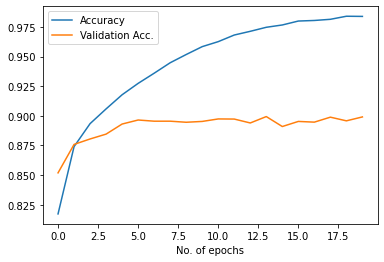

In [17]:
import matplotlib.pyplot as plt

plt.plot(r.history["accuracy"], label="Accuracy")
plt.plot(r.history["val_accuracy"], label="Validation Acc.")
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")

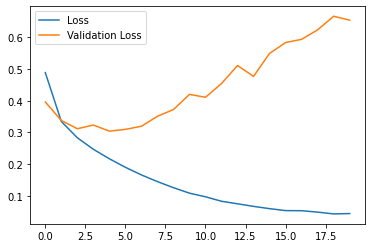

In [18]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="Validation Loss")
plt.legend()

### If we observe above model is clearly overfitting. 
#### We can regularize by providing it with Dropout or some kernel l2 regularizer.

In [19]:
i = Input(shape=(X_train[0].shape))
x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i,x)

In [20]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5525 - accuracy: 0.7971 - val_loss: 0.4237 - val_accuracy: 0.8425
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3791 - accuracy: 0.8582 - val_loss: 0.3602 - val_accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3287 - accuracy: 0.8768 - val_loss: 0.3345 - val_accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2977 - accuracy: 0.8883 - val_loss: 0.3193 - val_accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2704 - accuracy: 0.8995 - val_loss: 0.3059 - val_accuracy: 0.8879


Text(0, 0.5, 'Accuracy')

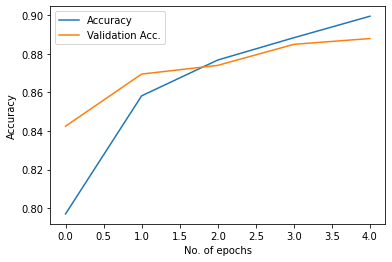

In [21]:
import matplotlib.pyplot as plt

plt.plot(r.history["accuracy"], label="Accuracy")
plt.plot(r.history["val_accuracy"], label="Validation Acc.")
plt.legend()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")

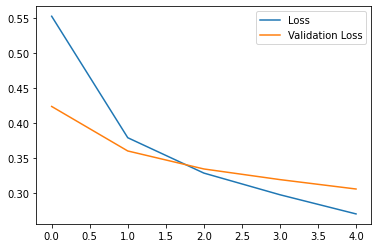

In [22]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="Loss")
plt.plot(r.history["val_loss"], label="Validation Loss")
plt.legend()

In [40]:
y_pred = model.predict(X_test)
metrics(y_test, y_pred)

[9 2 1 ... 8 1 5]
Accuracy Score :  0.8879
Precision Score :  0.8889139490184038
Classification Report :                precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.89      0.90      0.90      1000
           4       0.84      0.77      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.66      0.69      0.67      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix : 
 [[858   1  24  14   1   1  96   0   5   0]
 [  1 968   1  20   2   0   7   0   1   0]
 [ 12   2 833  10  47   0  9

<hr>

# Misclassified points

<hr>

In [45]:
misclassified_index = np.where(y_pred.argmax(axis=1) != y_test)
X_test = X_test * 255
misclassified_index[0]

array([  21,   23,   25, ..., 9972, 9977, 9991])

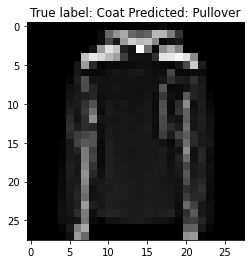

In [51]:
i = np.random.choice(misclassified_index[0])
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred.argmax(axis=1)[i]]));